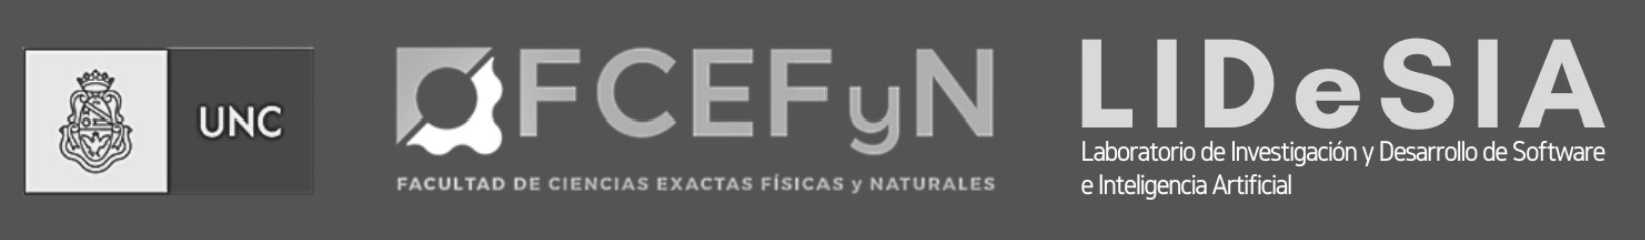



---


# **ENTORNO DE TRABAJO**


---
Tutorial de Google Colab:

[Entorno Colab 1](https://colab.research.google.com/drive/17uy0s5-kKQ8TW-ab6Ny48jwt33XN20F7)

[Entorno Colab 2](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

[Entorno Colab 3](https://colab.research.google.com/notebooks/intro.ipynb)


Informacion adicional:

[Colab Ultralytics](https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb#scrollTo=4JnkELT0cIJg)



---


# **GitHub**

---

## https://github.com/Proyecto-CYTED/CAPACITACION-LIDeSIA.git

---


# **Clonación de pesos sinápticos desde el repositorio**

---

In [1]:
!git clone https://github.com/Proyecto-CYTED/CAPACITACION-LIDeSIA.git

Cloning into 'CAPACITACION-LIDeSIA'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 24 (delta 0), reused 3 (delta 0), pack-reused 21 (from 2)
Receiving objects: 100% (24/24), 54.94 MiB | 5.07 MiB/s, done.
Resolving deltas: 100% (1/1), done.




---


## **INSTALACIÓN DE RECURSOS**


---



## Se adquiere recursos de almacenamiento, se instalan librerias y conectamos con google drive

In [2]:
#Verificar acceso a GPU/TPU
!nvidia-smi

Wed Aug 13 04:47:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
from IPython.display import display, Image
!pip install ultralytics

from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [4]:
#Librerias de manejo de imagenes
import cv2
from PIL import Image
#Librerias extra
import ipywidgets as widgets
import io
#Libreria de plots
import matplotlib.pyplot as plt
#Librerias numericas
import numpy as np



---


# **CONFIGURACIÓN DEL PROYECTO**


---



## En esta celda se establecen parámentros generales para la configuración del proyecto

In [5]:
# Librería para manejo del sistema operativo
import os

#Configuracion de las rutas
DRIVE_MOUNTPOINT = "CAPACITACION-LIDeSIA/clase_1/" # Ruta de Google Drive
WEIGHT_FOLDER = DRIVE_MOUNTPOINT # Updated path to weights within the cloned repo
OUTPUT_FOLDER =  DRIVE_MOUNTPOINT + 'Predicciones CYTED' # Output folder is not needed for this subtask
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

IMAGE_FOLDER = DRIVE_MOUNTPOINT + "imagenes_inferencia" # Added path to images within the cloned repo


In [6]:
# Configuraciones del Modelo
MODEL = WEIGHT_FOLDER + "/pesos.pt"

In [7]:
IMAGE_SIZE = 640 #px



---


# **MODELO**


---



### Informacion adicional: [Ultralytics Docs](https://docs.ultralytics.com/modes/predict/)

### Cargamos el modelo, este modelo reconoce las etiquetas "copa_seca", "caído" y "copa_viva"

In [8]:
# Cargar el modelo
model = YOLO(MODEL)


---


# **CARGA DE IMAGEN**


---


### En esta celda se realiza la carga de imagenes a inferir.

In [9]:
# Lista para almacenar las imágenes cargadas
all_loaded_images = {}
image_files = [f for f in os.listdir(IMAGE_FOLDER) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# cargar imagenes
for image_file in image_files:
    image_path = os.path.join(IMAGE_FOLDER, image_file)
    try:
        img = Image.open(image_path)
        all_loaded_images[image_file] = img
        print(f"Imagen cargada exitosamente: {image_file}")
    except Exception as e:
        print(f"Error loading image {image_file}: {e}")


Imagen cargada exitosamente: imagen (5).jpg
Imagen cargada exitosamente: imagen (4).JPG
Imagen cargada exitosamente: imagen (6).jpg
Imagen cargada exitosamente: imagen (1).jpeg
Imagen cargada exitosamente: imagen (2).jpg
Imagen cargada exitosamente: imagen (1).jpg
Imagen cargada exitosamente: imagen (3).JPG



---


# **VISUALIZAMOS LA DETECCIÓN**


---



0: 640x640 24 copa_secas, 7 caidos, 11 copa_vivas, 37.0ms
Speed: 24.9ms preprocess, 37.0ms inference, 349.0ms postprocess per image at shape (1, 3, 640, 640)


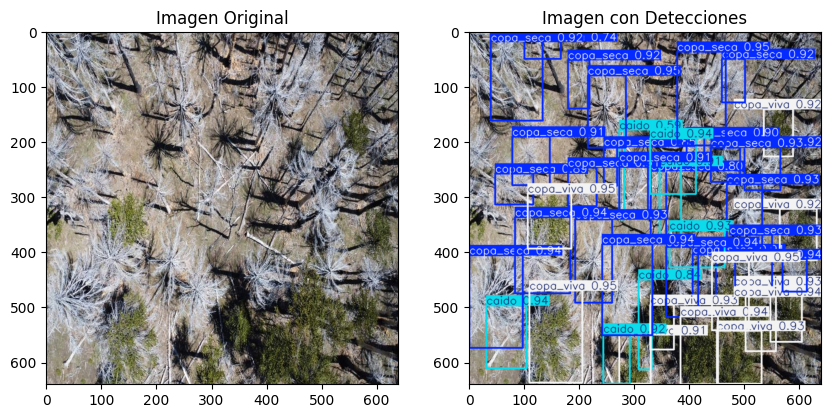


0: 640x640 12 copa_secas, 15 caidos, 14 copa_vivas, 37.1ms
Speed: 2.8ms preprocess, 37.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


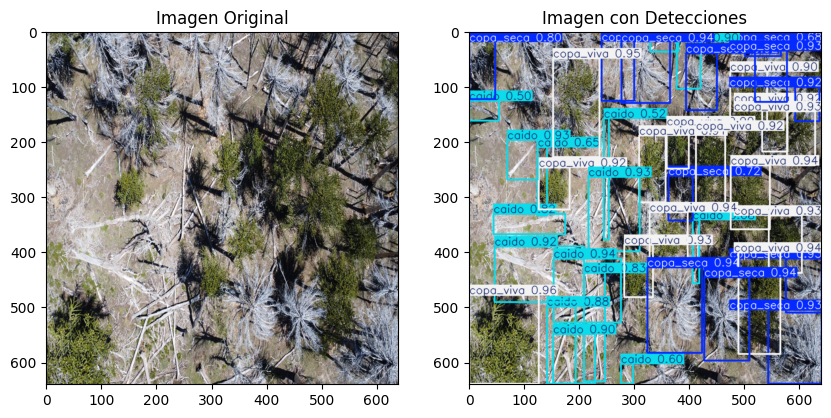


0: 640x640 (no detections), 37.1ms
Speed: 2.7ms preprocess, 37.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


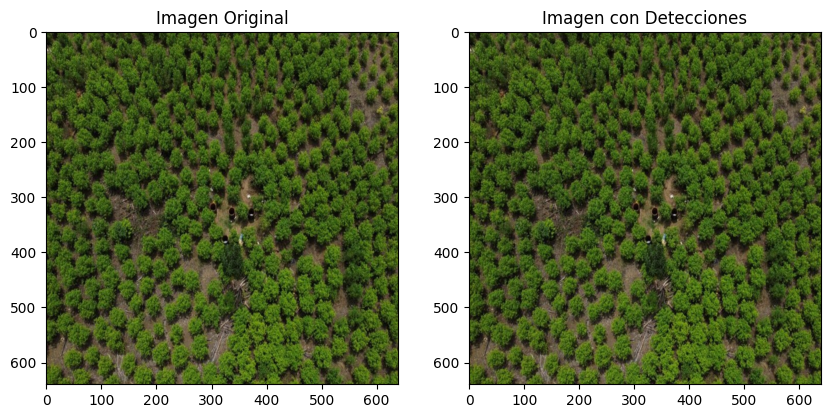


0: 640x640 1 caido, 37.1ms
Speed: 3.6ms preprocess, 37.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


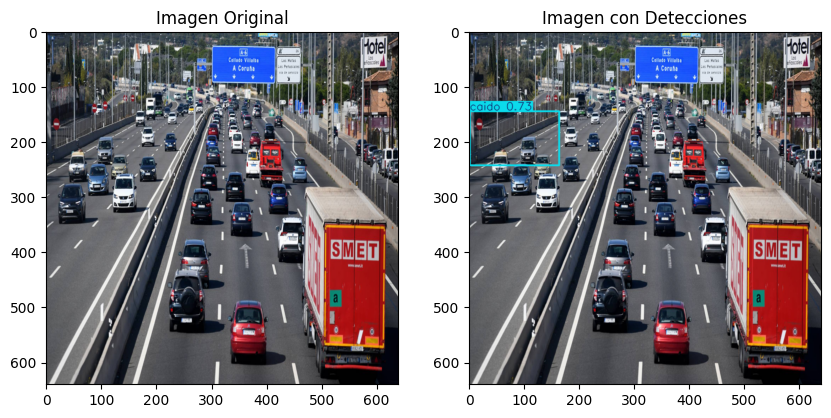


0: 640x640 1 copa_viva, 37.1ms
Speed: 4.9ms preprocess, 37.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


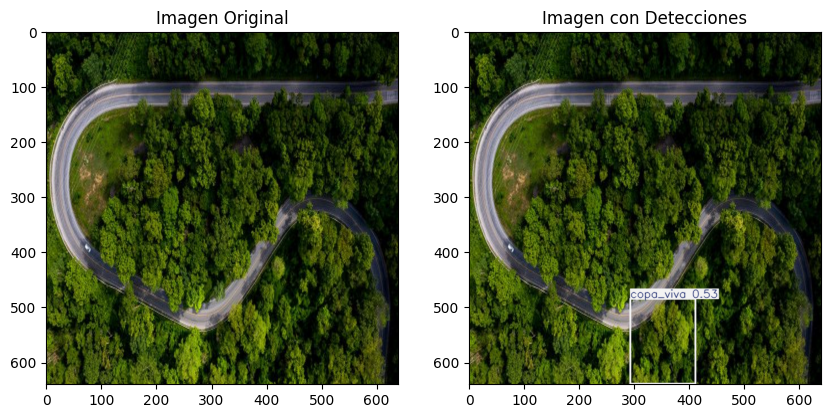


0: 640x640 1 caido, 6 copa_vivas, 37.1ms
Speed: 2.4ms preprocess, 37.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


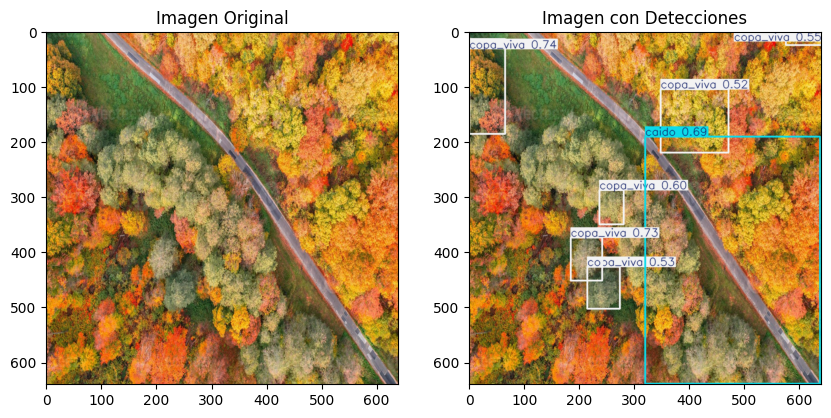


0: 640x640 34 copa_secas, 5 caidos, 3 copa_vivas, 37.1ms
Speed: 2.7ms preprocess, 37.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


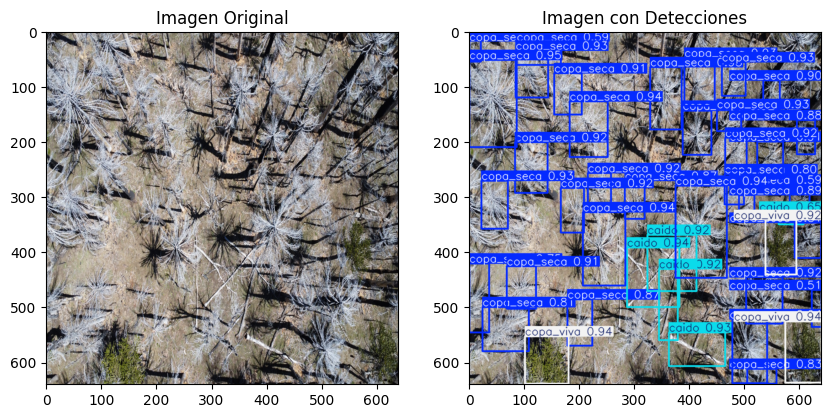


------------------------------------------------------------------------------------------------------------------------

- Se guardaron 7 imágenes con detecciones en: CAPACITACION-LIDeSIA/clase_1/Predicciones CYTED

------------------------------------------------------------------------------------------------------------------------


In [10]:
# Hacer inferencia para cada imagen cargada
total_class_count = {}

for name, file_info in all_loaded_images.items():
    # Check if the file_info is already a PIL Image object
    if isinstance(file_info, Image.Image):
        img = file_info
    else:
        # If not a PIL Image object, assume it's bytes and open it
        img = Image.open(io.BytesIO(file_info))


    # Redimensionar imagen
    img = img.resize((IMAGE_SIZE, IMAGE_SIZE))

    # ------- Realizar inferencia ---------
    # Show is disabled because it crashes in Colab
    results = model.predict(img, show=False, imgsz=IMAGE_SIZE, conf=0.5)

    # Visualización de resultados (from Ultralytics docs)
    for i, r in enumerate(results):
      im_bgr = r.plot()
      im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

      for index_class in r.boxes.cls:
        class_name = r.names[int(index_class)]

        if class_name not in total_class_count:
          total_class_count[class_name] = 0
        total_class_count[class_name] += 1



    # Guardar imágenes de prediccion
    im_rgb.save(os.path.join(OUTPUT_FOLDER, f'deteccion_{name}'))

    # Mostrar ambas imágenes
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img)
    axs[0].set_title('Imagen Original')
    axs[1].imshow(im_rgb)
    axs[1].set_title('Imagen con Detecciones')
    plt.show()

print(f"\n{'-' * 120}")
print(f"\n- Se guardaron {len(all_loaded_images)} imágenes con detecciones en: {OUTPUT_FOLDER}")
print(f"\n{'-' * 120}")



---


# **REPORTE**


---



In [11]:
print(f"\n{'-' * 120}")
print(f"\n{'*' * 60}")
print(f"{'Cuenta Total de Clases':^60}")


print(f"{'*' * 60}")
print(f"{'Clase':<30}{'Cantidad':>30}")  # Encabezados
print(f"{'-' * 60}")

for nombre_clase, cuenta in total_class_count.items():
    print(f"{nombre_clase:<30}{cuenta:>30}")  # Alineación de nombres y cuentas

print(f"\n{'-' * 120}")



------------------------------------------------------------------------------------------------------------------------

************************************************************
                   Cuenta Total de Clases                   
************************************************************
Clase                                               Cantidad
------------------------------------------------------------
copa_viva                                                 35
copa_seca                                                 70
caido                                                     29

------------------------------------------------------------------------------------------------------------------------


In [12]:
import gradio as gr
import cv2
from PIL import Image
import io
import numpy as np

# Supón que tienes tu modelo y IMAGE_SIZE definidos
# model = ...
# IMAGE_SIZE = ...

def show_images(imgs):
    total_class_count = {}
    all_img_rgb = []

    if imgs is None:
        return []

    # The input 'imgs' from gr.Gallery will be a list of tuples,
    # where each tuple is (image_path_or_bytes, label).
    # We need to process each image in this list.
    for img_info in imgs:
        # img_info is a tuple, the image data is the first element
        img = img_info[0]

        # Redimensionar imagen
        img = img.resize((IMAGE_SIZE, IMAGE_SIZE))

        # Convert PIL Image to numpy array (BGR format for OpenCV)
        img_np = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

        # ------- Realizar inferencia ---------
        # Show is disabled because it crashes in Colab
        results = model.predict(img_np, show=False, imgsz=IMAGE_SIZE, conf=0.5)

        # Visualización de resultados (from Ultralytics docs)
        for r in results:
            im_bgr = r.plot()
            im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

            # Count classes (optional, but good to keep if needed)
            for index_class in r.boxes.cls:
                class_name = r.names[int(index_class)]
                if class_name not in total_class_count:
                    total_class_count[class_name] = 0
                total_class_count[class_name] += 1

            all_img_rgb.append(im_rgb) # Add the processed image to the list

    # You can print the total_class_count here if you want to see it
    # print("Total Class Count:", total_class_count)


    return all_img_rgb # Return the list of processed images

app = gr.Interface(
    fn=show_images,
    inputs=gr.Gallery(label="Input Images Component", type="pil", show_label=True),
    outputs=gr.Gallery(label="Output Images Component", show_label=True)
)

app.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://1600bfb3254c082b67.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



0: 640x640 3 copa_vivas, 69.3ms
Speed: 3.4ms preprocess, 69.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 copa_vivas, 44.0ms
Speed: 2.8ms preprocess, 44.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 copa_seca, 16 copa_vivas, 37.1ms
Speed: 3.0ms preprocess, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 copa_vivas, 37.0ms
Speed: 2.9ms preprocess, 37.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://1600bfb3254c082b67.gradio.live


# **INFERENCIA CON MODELO PRE ENTRENADO (YOLOV8)**


------------------------------------------------------------------------------------------------------------------------
Performing inference with a pre-trained YOLOv8 model (COCO dataset)...

------------------------------------------------------------------------------------------------------------------------
Inferring on image: imagen (5).jpg

0: 640x640 (no detections), 40.0ms
Speed: 29.3ms preprocess, 40.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


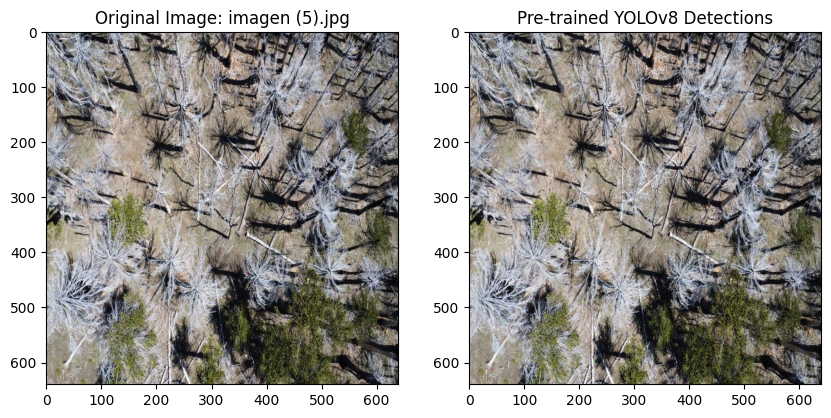

Inferring on image: imagen (4).JPG

0: 640x640 (no detections), 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


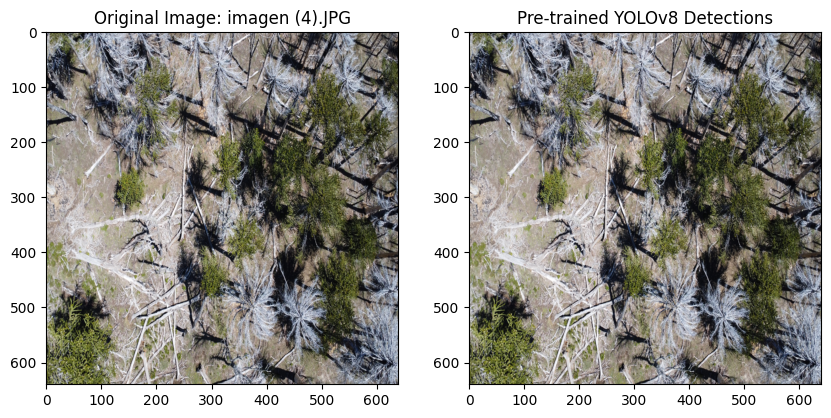

Inferring on image: imagen (6).jpg

0: 640x640 (no detections), 9.4ms
Speed: 2.4ms preprocess, 9.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


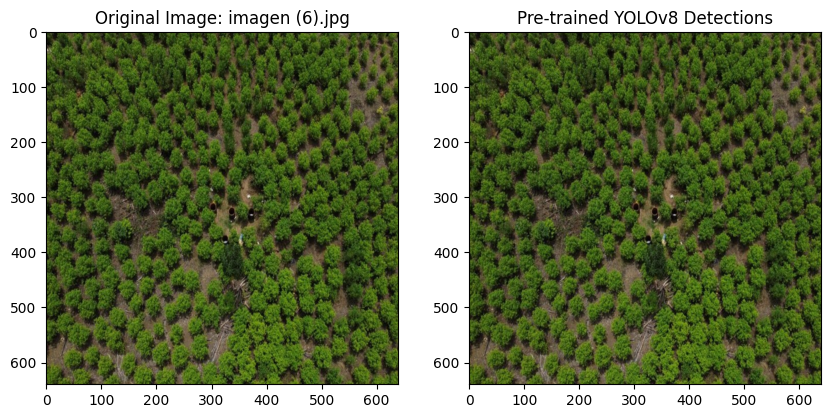

Inferring on image: imagen (1).jpeg

0: 640x640 34 cars, 2 buss, 6 trucks, 1 traffic light, 1 stop sign, 9.5ms
Speed: 2.5ms preprocess, 9.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


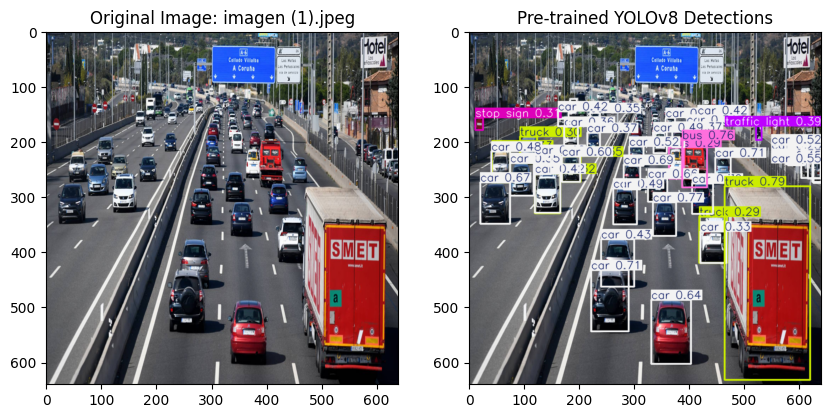

Inferring on image: imagen (2).jpg

0: 640x640 (no detections), 9.0ms
Speed: 2.8ms preprocess, 9.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


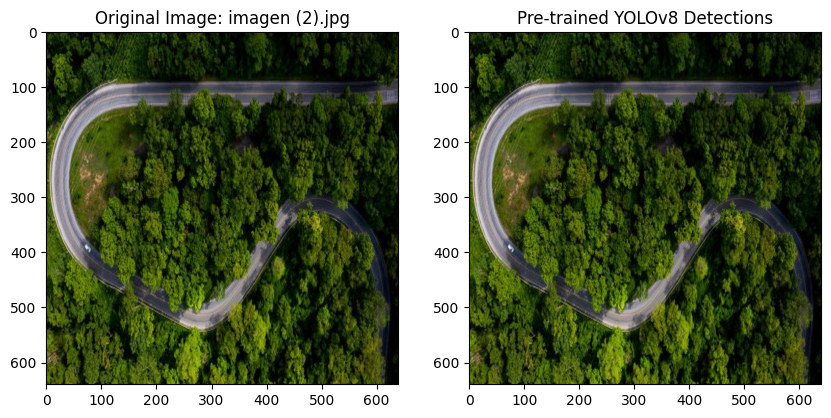

Inferring on image: imagen (1).jpg

0: 640x640 1 broccoli, 9.0ms
Speed: 2.5ms preprocess, 9.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


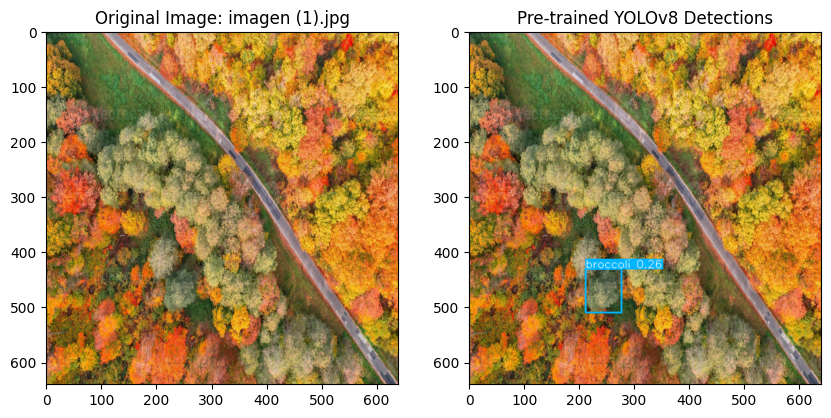

Inferring on image: imagen (3).JPG

0: 640x640 (no detections), 9.2ms
Speed: 2.7ms preprocess, 9.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


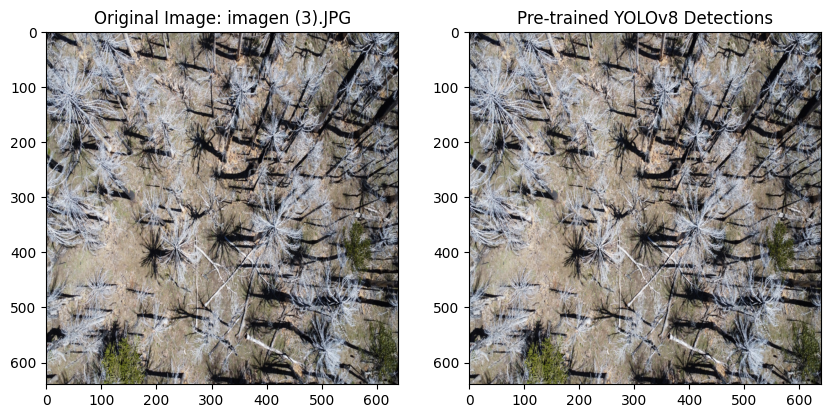


------------------------------------------------------------------------------------------------------------------------
Inference with pre-trained YOLOv8 complete.

------------------------------------------------------------------------------------------------------------------------


In [43]:
print(f"\n{'-' * 120}")
print("Performing inference with a pre-trained YOLOv8 model (COCO dataset)...")
print(f"\n{'-' * 120}")

# Load a pre-trained YOLOv8 model (e.g., yolov8n.pt for a small model)
# You can replace 'yolov8n.pt' with other models like 'yolov8s.pt', 'yolov8m.pt', etc.
pretrained_model = YOLO('yolov8n.pt')

# Perform inference on the loaded images
for name, img in all_loaded_images.items():
    print(f"Inferring on image: {name}")
    # Resize the image to the model's expected input size (usually 640x640)
    img_resized = img.resize((IMAGE_SIZE, IMAGE_SIZE))

    # Convert PIL Image to numpy array (BGR format for OpenCV if needed, but predict handles PIL)
    # results = pretrained_model.predict(cv2.cvtColor(np.array(img_resized), cv2.COLOR_RGB2BGR), show=False, imgsz=IMAGE_SIZE, conf=0.25)
    results = pretrained_model.predict(img_resized, show=False, imgsz=IMAGE_SIZE, conf=0.25)


    # Visualización de resultados
    for i, r in enumerate(results):
      im_bgr = r.plot()
      im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

      # Display the results
      fig, axs = plt.subplots(1, 2, figsize=(10, 5))
      axs[0].imshow(img_resized)
      axs[0].set_title(f'Original Image: {name}')
      axs[1].imshow(im_rgb)
      axs[1].set_title('Pre-trained YOLOv8 Detections')
      plt.show()

print(f"\n{'-' * 120}")
print("Inference with pre-trained YOLOv8 complete.")
print(f"\n{'-' * 120}")